In [ ]:
'''Interpolation is a mathematical method for constructing a function from a discrete set of
data points. The interpolation function, or interpolant, should exactly coincide with the
given data points, and it can also be evaluated for other intermediate input values within
the sampled range.'''
'''Extrapolation is a concept that is related to interpolation. It refers to evaluating
the estimated function outside of the sampled range, while interpolation only refers
to evaluating the function within the range that is spanned by the given data points.
Extrapolation can often be riskier than interpolation, because it involves estimating a 
function in a region where it has not been sampled.'''
'''To perform plynomial interpolation in Python, we use the polynomial module from
NumPy and the interpolate module from SciPy for spline and multivariate interpolation.'''

In [92]:
from numpy import polynomial as P
p1 = P.Polynomial([1, 2, 3]) #Polynomial is a function in polynomial module to create a polynomial
print(p1)

1.0 + 2.0 x + 3.0 x**2


In [93]:
#Finding roots of a Polynomial:
print(p1.roots())

[-0.33333333-0.47140452j -0.33333333+0.47140452j]


In [94]:
#Approximating Polynomial from roots:
p2 = P.Polynomial.fromroots([-0.33333333-0.47140452j, -0.33333333+0.47140452j])
print(p2)

(0.3333333303653193+0j) + (0.66666666+0j) x + (1+0j) x**2


In [95]:
#Evaluating Polynomial at specific value of x:
print(p2(1),'\n',p2(array([1,2,3])))

(1.9999999903653194+0j) 
 [ 1.99999999+0.j  5.66666665+0.j 11.33333331+0.j]


In [96]:
'''In addition to the Polynomial class for polynomials in the standard power basis,
the polynomial module also has classes for representing polynomials in Chebyshev,
Legendre, Laguerre, and Hermite bases, with the names Chebyshev, Legendre,
Laguerre, Hermite (Physicists’), and HermiteE (Probabilists’), respectively.'''
c1 = P.Chebyshev([1, 2, 3])
l1=P.Legendre([1, 2, 3])
print(c1.roots())
l1

[-0.76759188  0.43425855]


Legendre([1., 2., 3.], domain=[-1,  1], window=[-1,  1], symbol='x')

In [99]:
#Polynomial Interpolation:
# Define the data points (x, y)
x = array([1, 2, 3, 4])
y = array([1, 3, 5, 4])
'''To interpolate a polynomial through these points, we need to use a polynomial of
third degree (number of data points minus one).'''
deg=len(x)-1
A = P.polynomial.polyvander(x, deg) # The Vandermonde matrix is used in polynomial interpolation to find the coefficients of the interpolating polynomial(lEARN FROM NM).
c = linalg.solve(A, y) 
polynomial = P.Polynomial(c)
print('polynomial(2.5)=',polynomial(2.5))
polynomial

polynomial(2.5)= 4.187499999999998


Polynomial([ 2. , -3.5,  3. , -0.5], domain=[-1,  1], window=[-1,  1], symbol='x')

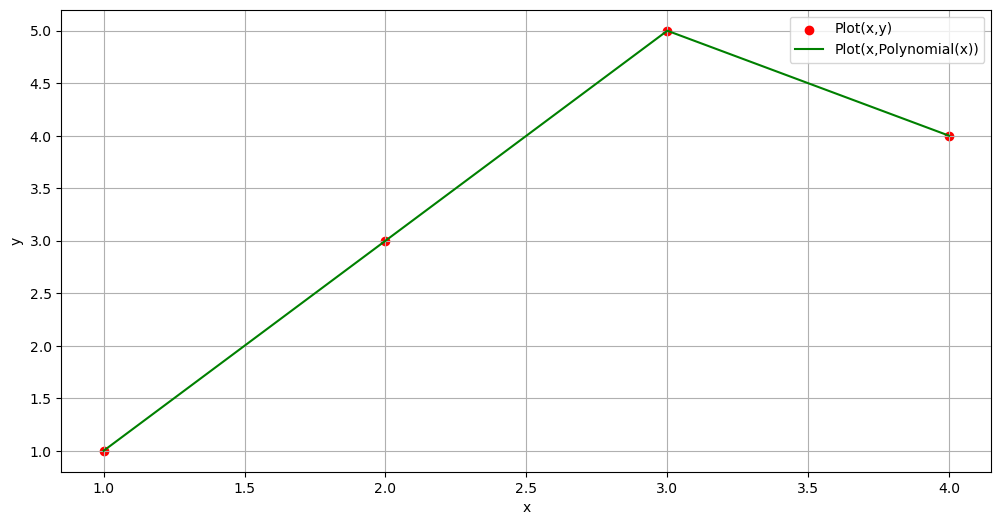

In [116]:
#Visualization of Model Consistency:
from matplotlib.pyplot import *
fig,ax=subplots(1,1,figsize=(12,6))
ax.scatter(x,y,color='red',label='Plot(x,y)')
ax.plot(x,polynomial(x),'g',label='Plot(x,Polynomial(x))')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.grid()

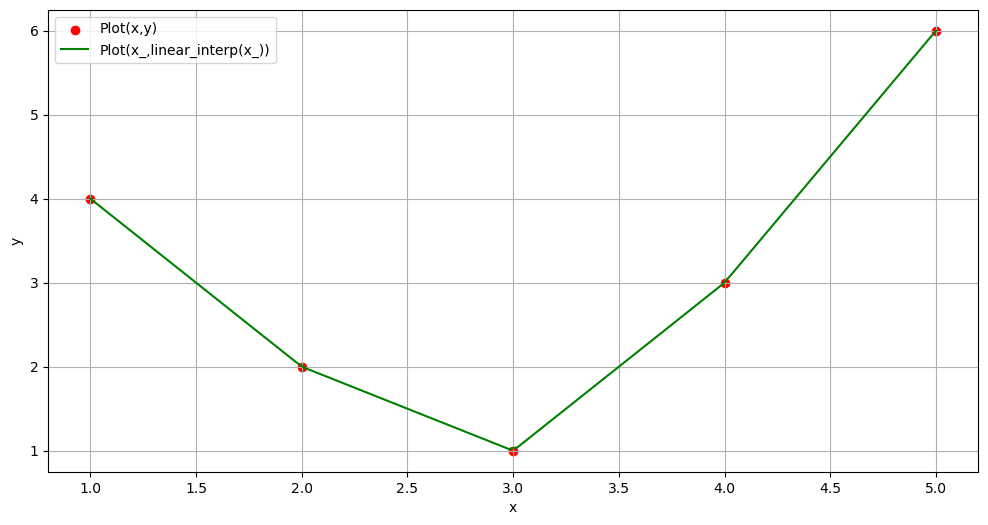

In [122]:
#Spline Interpolation:
'''In spline interpolation, instead of fitting a single polynomial over the entire range of data, 
the data range is divided into smaller intervals, and different polynomials are fitted to each interval. 
These polynomials are typically low-degree, such as linear (degree 1), quadratic (degree 2), or cubic (degree 3) polynomials. 
Hence, we cannot print resutling polynomials.'''
from scipy import interpolate as I
# Define the data points (x, y)
x = array([1, 2, 3, 4, 5])
y = array([4, 2, 1, 3, 6])
# Perform linear interpolation using interp1d 
linear_interp = I.interp1d(x, y) #equvivalent to interp1d(x,y,kind=1)
x_=linspace(1,5,100)
fig,ax=subplots(1,1,figsize=(12,6))
ax.scatter(x,y,color='red',label='Plot(x,y)')
ax.plot(x_,linear_interp(x_), 'g',label='Plot(x_,linear_interp(x_))')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.grid()

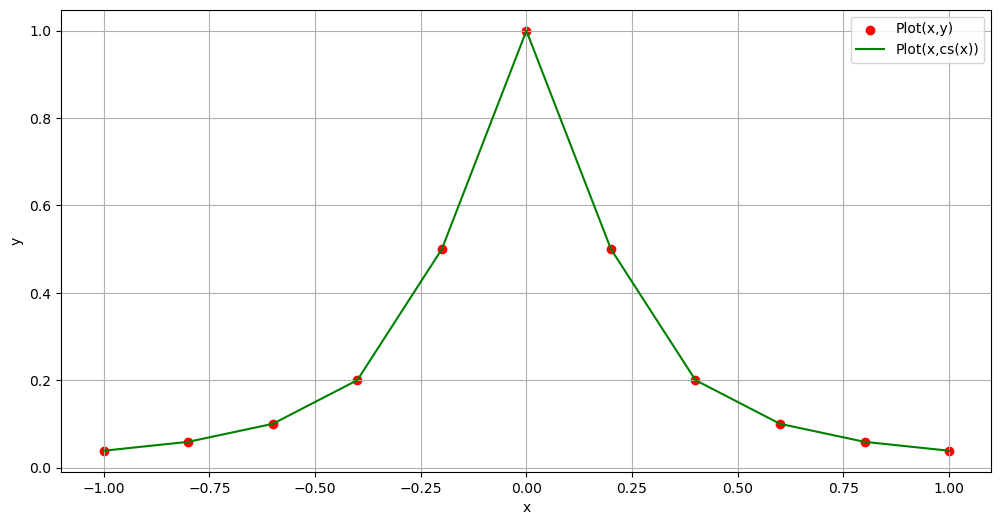

In [125]:
#CubicSpline:
x = linspace(-1, 1, 11)
def runge(x):
    return 1/(1 + 25 * x**2)
y = runge(x)
cs = interpolate.interp1d(x, y, kind=3)
fig,ax=subplots(1,1,figsize=(12,6))
ax.scatter(x,y,color='red',label='Plot(x,y)')
ax.plot(x,cs(x),'g',label='Plot(x,cs(x))')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.grid()

In [149]:
#Multivariate Interpolation:
'''Out of Scope of this course. You can learn in Higher Mathematics'''